In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f7743e31ca9b551ade9a8903b568ad0


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barra dos coqueiros
Processing Record 2 of Set 1 | muli
Processing Record 3 of Set 1 | port-gentil
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | halifax
Processing Record 9 of Set 1 | sumbe
Processing Record 10 of Set 1 | johi
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | shunyi
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | bud
Processing Record 18 of Set 1 | wittenberge
Processing Record 19 of Set 1 | vila franca do campo
Processing Record 20 of Set 1 | saldanha
Processing Record 21 of Set 1 | inverness
Processing Record 22 of Set 1 | nikolskoye
Processing Record 23 of Se

City not found. Skipping...
Processing Record 37 of Set 4 | praia
Processing Record 38 of Set 4 | lorengau
Processing Record 39 of Set 4 | svetlogorsk
Processing Record 40 of Set 4 | anadyr
Processing Record 41 of Set 4 | indaial
Processing Record 42 of Set 4 | solnechnyy
Processing Record 43 of Set 4 | iquique
Processing Record 44 of Set 4 | esperance
Processing Record 45 of Set 4 | tezu
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | leningradskiy
Processing Record 48 of Set 4 | wad madani
Processing Record 49 of Set 4 | livenka
Processing Record 50 of Set 4 | noumea
Processing Record 1 of Set 5 | luderitz
Processing Record 2 of Set 5 | houston
Processing Record 3 of Set 5 | along
Processing Record 4 of Set 5 | mount gambier
Processing Record 5 of Set 5 | kurchum
Processing Record 6 of Set 5 | acapulco
Processing Record 7 of Set 5 | naze
Processing Record 8 of Set 5 | san policarpo
Processing Record 9 of Set 5 | ardatov
Processing Record 10 of Set 5 | narga

Processing Record 24 of Set 8 | nishihara
Processing Record 25 of Set 8 | boguchany
Processing Record 26 of Set 8 | changji
Processing Record 27 of Set 8 | durres
Processing Record 28 of Set 8 | banda aceh
Processing Record 29 of Set 8 | tasiilaq
Processing Record 30 of Set 8 | ucluelet
Processing Record 31 of Set 8 | fenton
Processing Record 32 of Set 8 | puerto penasco
Processing Record 33 of Set 8 | kavieng
Processing Record 34 of Set 8 | sao filipe
Processing Record 35 of Set 8 | armizonskoye
Processing Record 36 of Set 8 | srednekolymsk
Processing Record 37 of Set 8 | humaita
Processing Record 38 of Set 8 | kiunga
Processing Record 39 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 40 of Set 8 | ust-maya
Processing Record 41 of Set 8 | andenes
Processing Record 42 of Set 8 | manzil jamil
City not found. Skipping...
Processing Record 43 of Set 8 | senno
Processing Record 44 of Set 8 | kundiawa
Processing Record 45 of Set 8 | vangaindrano
Processing Record 46 o

Processing Record 14 of Set 12 | cheney
Processing Record 15 of Set 12 | phan rang
City not found. Skipping...
Processing Record 16 of Set 12 | sachse
Processing Record 17 of Set 12 | benguela
Processing Record 18 of Set 12 | ouricuri
Processing Record 19 of Set 12 | karamea
City not found. Skipping...
Processing Record 20 of Set 12 | ankpa
Processing Record 21 of Set 12 | port blair
Processing Record 22 of Set 12 | bubaque
Processing Record 23 of Set 12 | lazaro cardenas
Processing Record 24 of Set 12 | corinto
Processing Record 25 of Set 12 | iquitos
Processing Record 26 of Set 12 | opuwo
Processing Record 27 of Set 12 | oksfjord
Processing Record 28 of Set 12 | namie
Processing Record 29 of Set 12 | warqla
City not found. Skipping...
Processing Record 30 of Set 12 | chisec
Processing Record 31 of Set 12 | narsaq
Processing Record 32 of Set 12 | coquimbo
Processing Record 33 of Set 12 | baiyin
Processing Record 34 of Set 12 | mayskiy
Processing Record 35 of Set 12 | colonia
Processin

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barra Dos Coqueiros,-10.9089,-37.0386,84.22,74,75,12.66,BR,2022-04-16 00:37:11
1,Muli,2.9167,73.5667,83.59,71,89,5.53,MV,2022-04-16 00:37:11
2,Port-Gentil,-0.7193,8.7815,80.19,82,100,2.30,GA,2022-04-16 00:37:12
3,Albany,42.6001,-73.9662,61.21,39,71,9.98,US,2022-04-16 00:35:13
4,Busselton,-33.6500,115.3333,66.13,69,100,7.20,AU,2022-04-16 00:36:04
5,Cherskiy,68.7500,161.3000,20.28,93,100,6.73,RU,2022-04-16 00:33:14
6,Yellowknife,62.4560,-114.3525,21.72,49,75,6.91,CA,2022-04-16 00:37:13
7,Halifax,44.6453,-63.5724,44.69,95,100,3.44,CA,2022-04-16 00:35:30
8,Sumbe,-11.2061,13.8437,77.50,90,100,5.84,AO,2022-04-16 00:37:13
9,Johi,26.6921,67.6133,87.85,19,1,9.08,PK,2022-04-16 00:37:14


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

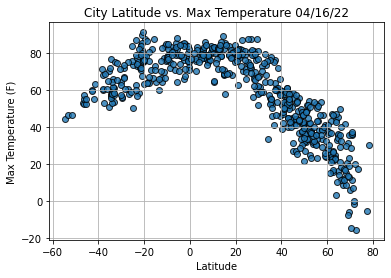

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

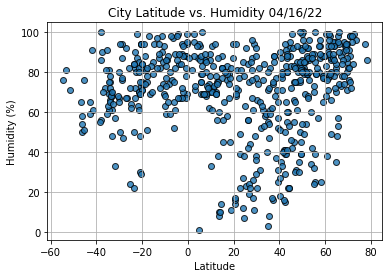

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

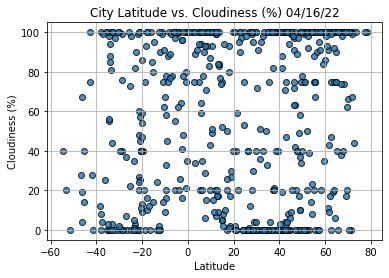

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

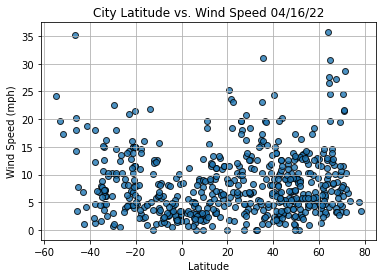

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()